<a href="https://colab.research.google.com/github/Tongue923/Load_forecasting/blob/main/load_forecasting_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import data from google drive



In [2]:
ROOT_DIR = '/content/drive/My Drive/fyp'


In [3]:
import pandas as pd

data = pd.read_excel(f"{ROOT_DIR}/data/malaysia_all_data_for_paper.xlsx" )


In [4]:
data

,date,time,temperature ©,humidity(%),holiday,load
0,2009-01-01,01:00:00,24,100,0,30360
1,2009-01-01,02:00:00,24,100,0,29155
2,2009-01-01,03:00:00,24,94,0,28086
3,2009-01-01,04:00:00,24,94,0,28031
4,2009-01-01,05:00:00,24,94,0,27730
...,...,...,...,...,...,...
17515,2010-12-31,20:00:00,26,89,0,53819
17516,2010-12-31,21:00:00,26,83,0,51543
17517,2010-12-31,22:00:00,25,89,0,44961
17518,2010-12-31,23:00:00,24,94,0,38484


# Plot graph


In [5]:
df = pd.DataFrame(data)
data_sample = df.sample(n=30).sort_values(by='date')


In [6]:
data_sample['datetime'] = pd.to_datetime(data_sample['date'].astype(str) + ' ' + data_sample['time'].astype(str))


Text(0, 0.5, 'load')

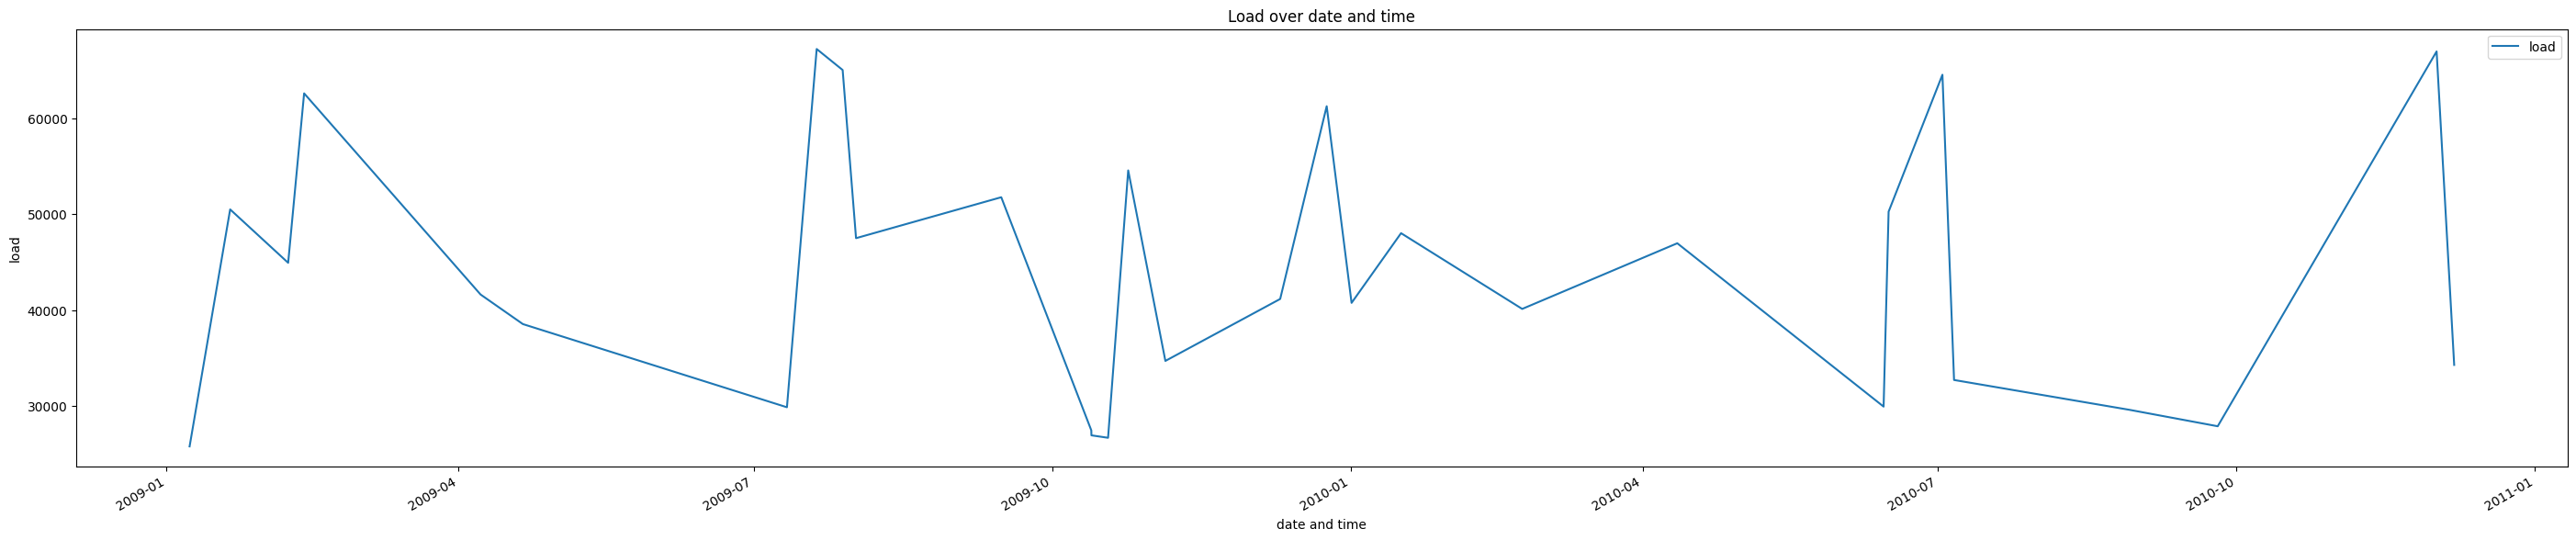

In [7]:
plt_data_sample = data_sample.plot(x='datetime', y='load',figsize=(35,7))
plt_data_sample.set_title("Load over date and time")
plt_data_sample.set_xlabel("date and time")
plt_data_sample.set_ylabel("load")


# Prepare data


In [8]:
data['date'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))
data = data.drop(['time'], axis=1)


In [9]:
data

,date,temperature ©,humidity(%),holiday,load
0,2009-01-01 01:00:00,24,100,0,30360
1,2009-01-01 02:00:00,24,100,0,29155
2,2009-01-01 03:00:00,24,94,0,28086
3,2009-01-01 04:00:00,24,94,0,28031
4,2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...,...
17515,2010-12-31 20:00:00,26,89,0,53819
17516,2010-12-31 21:00:00,26,83,0,51543
17517,2010-12-31 22:00:00,25,89,0,44961
17518,2010-12-31 23:00:00,24,94,0,38484


In [10]:
import numpy as np

data.index = pd.to_datetime(data['date'], format='%Y.%m.%d %H:%M:%S')
data

,date,temperature ©,humidity(%),holiday,load
date,,,,,
2009-01-01 01:00:00,2009-01-01 01:00:00,24,100,0,30360
2009-01-01 02:00:00,2009-01-01 02:00:00,24,100,0,29155
2009-01-01 03:00:00,2009-01-01 03:00:00,24,94,0,28086
2009-01-01 04:00:00,2009-01-01 04:00:00,24,94,0,28031
2009-01-01 05:00:00,2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...,...
2010-12-31 20:00:00,2010-12-31 20:00:00,26,89,0,53819
2010-12-31 21:00:00,2010-12-31 21:00:00,26,83,0,51543
2010-12-31 22:00:00,2010-12-31 22:00:00,25,89,0,44961


In [11]:
df = data.drop(['date'], axis=1)
df

,temperature ©,humidity(%),holiday,load
date,,,,
2009-01-01 01:00:00,24,100,0,30360
2009-01-01 02:00:00,24,100,0,29155
2009-01-01 03:00:00,24,94,0,28086
2009-01-01 04:00:00,24,94,0,28031
2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...
2010-12-31 20:00:00,26,89,0,53819
2010-12-31 21:00:00,26,83,0,51543
2010-12-31 22:00:00,25,89,0,44961


In [12]:
def df_to_X_y(df, window_size = 6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][3]
    y.append(label)
  return np.array(X), np.array(y)

In [13]:
x, y = df_to_X_y(df)
x, x.shape, y, y.shape

(array([[[24, 100, 0, 30360],
         [24, 100, 0, 29155],
         [24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490]],
 
        [[24, 100, 0, 29155],
         [24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490],
         [24, '94\xa0', 0, 37081]],
 
        [[24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490],
         [24, '94\xa0', 0, 37081],
         [24, '94\xa0', 0, 46975]],
 
        ...,
 
        [[30, '70\xa0', 0, 51163],
         [29, '74\xa0', 0, 50675],
         [28, '79\xa0', 0, 50164],
         [27, '89\xa0', 0, 50947],
         [26, '89\xa0', 0, 53819],
         [26, '83\xa0', 0, 51543]],
 
        [[29, '74\xa0', 0, 50675],
         [28, '79\xa0', 0, 50164],
         [27, '89\xa0', 0, 50947],
         [26, '89\xa0', 0, 53819],
        

In [14]:
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [15]:
x, x.shape, y, y.shape

(array([[[2.4000e+01, 1.0000e+02, 0.0000e+00, 3.0360e+04],
         [2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04]],
 
        [[2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.7081e+04]],
 
        [[2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.70

# Split data for training, validation and testing

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, shuffle=False)

In [18]:
x_train, y_train, x_val, y_val, x_test, y_test

(array([[[2.4000e+01, 1.0000e+02, 0.0000e+00, 3.0360e+04],
         [2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04]],
 
        [[2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.7081e+04]],
 
        [[2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.70

# Preprocess data

In [19]:
temp_training_mean = np.mean(x_train[:, :, 3])
temp_training_std = np.std(x_train[:, :, 3])

def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

In [20]:
preprocess(x_train)
preprocess(x_val)
preprocess(x_test)

array([[[ 2.7000000e+01,  8.4000000e+01,  1.0000000e+00,  3.6193055e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01]],

       [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01],
        [ 2.4000000e+01,  1.0000000e+02,  1.0000000e+00, -1.0498528e+00]],

       [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.400000

In [21]:
x_train.shape, x_val.shape, x_test.shape

((11208, 6, 4), (2803, 6, 4), (3503, 6, 4))

In [22]:

def preprocess1(Y):
  Y[:] = (Y[:] - temp_training_mean) / temp_training_std
  return Y

In [23]:
preprocess1(y_train)
preprocess1(y_val)
preprocess1(y_test)

array([-1.0498528 , -1.142952  , -1.1491401 , ...,  0.06837973,
       -0.38195866, -0.5039818 ], dtype=float32)

In [24]:
y_train.shape, y_val.shape, y_test.shape

((11208,), (2803,), (3503,))

# Train and validate data

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



In [26]:
x_train, x_train.shape, y_train, y_train.shape, x_val, x_val.shape, y_val, y_val.shape

(array([[[ 24.        , 100.        ,   0.        ,  -0.9468111 ],
         [ 24.        , 100.        ,   0.        ,  -1.0305934 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.129672  ],
         [ 24.        ,  94.        ,   0.        ,  -0.93777233]],
 
        [[ 24.        , 100.        ,   0.        ,  -1.0305934 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.129672  ],
         [ 24.        ,  94.        ,   0.        ,  -0.93777233],
         [ 24.        ,  94.        ,   0.        ,  -0.47950765]],
 
        [[ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.

In [108]:

model1 = Sequential()
model1.add(InputLayer((6, 4)))
model1.add(LSTM(256, return_sequences=False))
model1.add(Dropout(0.1))
model1.add(Dense(64, 'relu6'))
model1.add(Dense(1, 'linear'))



In [109]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 6, 256)            267264    
                                                                 
 dropout_17 (Dropout)        (None, 6, 256)            0         
                                                                 
 lstm_19 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 472705 (1.80 MB)
Trainable params: 47270

In [110]:
model1.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0008), metrics=[RootMeanSquaredError()])
cp1 = ModelCheckpoint(ROOT_DIR +'/model1/', save_best_only=True)


In [112]:
model1.fit(x_train, y_train, epochs=30, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp1])

113/113 [==============================] - 11s 77ms/step - loss: 0.2500 - root_mean_squared_error: 0.5000 - val_loss: 0.1147 - val_root_mean_squared_error: 0.3386


#Test Model

In [113]:
x_test, x_test.shape, y_test, y_test.shape

(array([[[ 2.7000000e+01,  8.4000000e+01,  1.0000000e+00,  3.6193055e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01]],
 
        [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01],
         [ 2.4000000e+01,  1.0000000e+02,  1.0000000e+00, -1.0498528e+00]],
 
        [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.500000

In [114]:
from tensorflow.keras.models import load_model
model_lstm_1layer = load_model(ROOT_DIR+'/model1/')

In [115]:
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start :end])
  plt.plot(df['Actuals'][start: end])
  figure(figsize=(60 , 650), dpi=80)
  return df, mse(predictions, y)

110/110 [==============================] - 2s 12ms/step


(      Predictions   Actuals
 0       -1.102728 -1.049853
 1       -1.291484 -1.142952
 2       -1.273613 -1.149140
 3       -1.180480 -1.032888
 4       -0.852994 -1.063898
 ...           ...       ...
 3498     0.068729  0.684266
 3499     0.248172  0.526019
 3500     0.483839  0.068380
 3501    -0.124187 -0.381959
 3502    -0.683674 -0.503982
 
 [3503 rows x 2 columns],
 0.11835919)

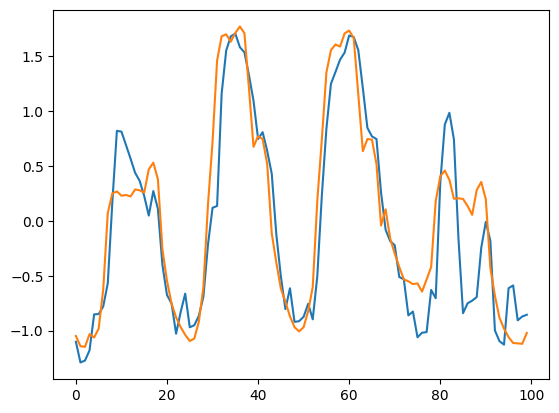

<Figure size 4800x52000 with 0 Axes>

In [116]:
plot_predictions1(model_lstm_1layer, x_test, y_test)

# 2-layer LSTM

In [124]:

model2 = Sequential()
model2.add(InputLayer((6, 4)))
model2.add(LSTM(256, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(LSTM(256, return_sequences=False))
model2.add(Dropout(0.5))
model2.add(Dense(64, 'relu6'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 6, 256)            267264    
                                                                 
 dropout_24 (Dropout)        (None, 6, 256)            0         
                                                                 
 lstm_26 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 809089 (3.09 MB)
Trainable params: 8090

In [126]:
model2.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0008), metrics=[RootMeanSquaredError()])
cp2 = ModelCheckpoint(ROOT_DIR +'/model2/', save_best_only=True)


In [128]:
model2.fit(x_train, y_train, epochs=30, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp2])

113/113 [==============================] - 31s 256ms/step - loss: 0.3911 - root_mean_squared_error: 0.6254 - val_loss: 0.1203 - val_root_mean_squared_error: 0.3468


110/110 [==============================] - 3s 18ms/step


(      Predictions   Actuals
 0       -1.132856 -1.049853
 1       -1.162676 -1.142952
 2       -1.126781 -1.149140
 3       -1.031887 -1.032888
 4       -0.834502 -1.063898
 ...           ...       ...
 3498    -0.070855  0.684266
 3499    -0.125571  0.526019
 3500     0.059536  0.068380
 3501    -0.147240 -0.381959
 3502    -0.587433 -0.503982
 
 [3503 rows x 2 columns],
 0.15063207)

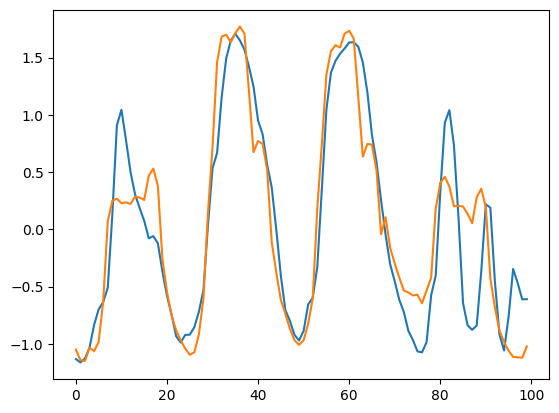

<Figure size 4800x52000 with 0 Axes>

In [129]:
model_lstm_2layer = load_model(ROOT_DIR+'/model2/')
plot_predictions1(model_lstm_2layer, x_test, y_test)

# 3-layer LSTM

In [131]:
model3 = Sequential()
model3.add(InputLayer((6, 4)))
model3.add(LSTM(256, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(256, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(256, return_sequences=False))
model3.add(Dropout(0.5))
model3.add(Dense(64, 'relu6'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 6, 256)            267264    
                                                                 
 dropout_29 (Dropout)        (None, 6, 256)            0         
                                                                 
 lstm_31 (LSTM)              (None, 6, 256)            525312    
                                                                 
 dropout_30 (Dropout)        (None, 6, 256)            0         
                                                                 
 lstm_32 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 64)              

In [135]:
model3.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0008), metrics=[RootMeanSquaredError()])
cp3 = ModelCheckpoint(ROOT_DIR +'/model3/', save_best_only=True)

In [136]:
model3.fit(x_train, y_train, epochs=30, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp3])

113/113 [==============================] - 62s 320ms/step - loss: 0.1868 - root_mean_squared_error: 0.4322 - val_loss: 0.0982 - val_root_mean_squared_error: 0.3134


110/110 [==============================] - 5s 32ms/step


(      Predictions   Actuals
 0       -1.173154 -1.049853
 1       -1.214953 -1.142952
 2       -1.202021 -1.149140
 3       -1.112312 -1.032888
 4       -0.921970 -1.063898
 ...           ...       ...
 3498    -0.085330  0.684266
 3499    -0.131038  0.526019
 3500    -0.039126  0.068380
 3501    -0.258218 -0.381959
 3502    -0.736044 -0.503982
 
 [3503 rows x 2 columns],
 0.15231307)

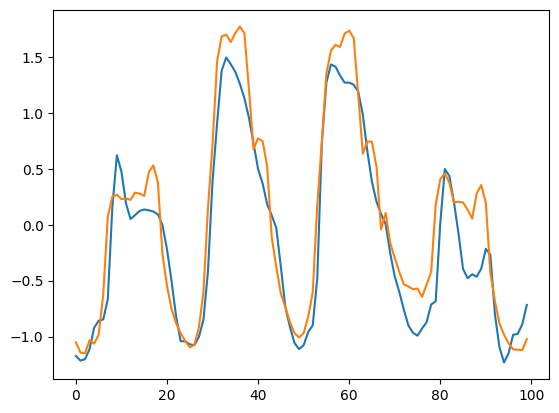

<Figure size 4800x52000 with 0 Axes>

In [137]:
model_lstm_3layer = load_model(ROOT_DIR+'/model3/')
plot_predictions1(model_lstm_3layer, x_test, y_test)